Electron Cooling simulations:

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def compute_FWHM(x, y):
    half = np.max(y) / 2.0
    above = np.where(y >= half)[0]
    if len(above) < 2:
        return 0.0
    return x[above[-1]] - x[above[0]]

c:\Users\shiranev\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:3639: RuntimeWarning: overflow encountered in sin
  return sin(y)/y
c:\Users\shiranev\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:3639: RuntimeWarning: invalid value encountered in divide
  return sin(y)/y
C:\Users\shiranev\AppData\Local\Temp\ipykernel_9268\1307049277.py:59: RuntimeWarning: invalid value encountered in divide
  rho_f = rho_f/ np.sum(rho_f*dE)  # Normalize the final state probability density
C:\Users\shiranev\AppData\Local\Temp\ipykernel_9268\2242292241.py:3: RuntimeWarning: invalid value encountered in greater_equal
  above = np.where(y >= half)[0]
c:\Users\shiranev\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


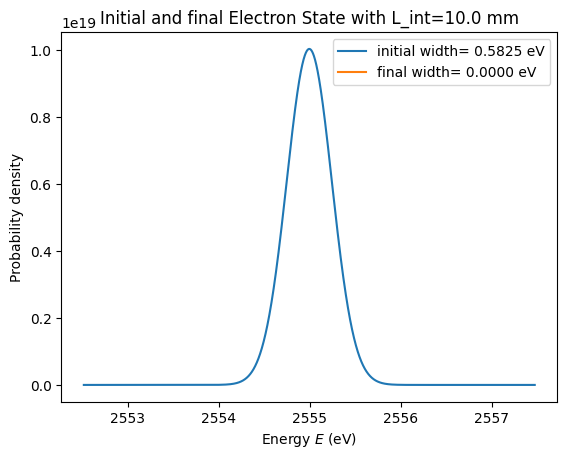

In [146]:
c    = 2.99792458e8        # m/s
m    = 9.109383e-31        # kg
e    = 1.60217662e-19      # C
hbar = 1.054571800e-34     # J·s
eps0 = 8.854187817e-12     # F/m
v0     = 0.1 * c                                # electron carrier velocity
E0     = 0.5 * m * v0**2                        # central electron energy (J)

lambda0 = 500e-9                                # central wavelength (m)
omega0  = 2 * np.pi * c / lambda0               # central angular frequency (rad/s)
v_g     = v0                 # photon group velocity (m/s)

deltaE = 0.1 * hbar * omega0                    # energy spread (J)

k0     = np.sqrt(2 * m * E0) / hbar             # central momentum (1/m)
k0_m_hw     = np.sqrt(2 * m * (E0-hbar *omega0)) / hbar
q0 = k0 - k0_m_hw

# From Phase‐matching expansion (approximation) to fit LINEAR dispersion relations:
recoil = (-1 / (k0 * v0**2))                                  # second‐order term
# Define conversion functions:
def k(E):
    return np.sqrt(2 * m * E) / hbar

lambdaDB = 2 * np.pi  / k0 # de Broglie wavelength (m)
# critical length for cooling (m)
L_critical = (4/np.pi)*lambdaDB*(E0/deltaE)**2  
# L_int = 0.5*L_critical  
L_int = 0.01  # interaction length (m)
T     = L_int / v0     # interaction time (s)

def Energy_from_momentum(k):
    return (hbar * k)**2 / (2 * m)  # Energy from momentum k
N = 2**12
# --- ENERGY GRID
N_E   = N    # number of energy points

E_min = E0 - 10*deltaE
E_max = E0 + 10*deltaE

E_f   = np.linspace(E_min, E_max, N_E)
dE    = E_f[1] - E_f[0]
energy_span = E_max - E_min

δE_f =  E_f - E0

N_ω = N
omega_span = 10 * deltaE / hbar  # Narrow span around ω₀
ω_min = max(omega0 - omega_span/2 , 0*omega0)  # Start from ω₀ - span/2
ω_max = omega0 + omega_span/2   # End at ω₀ + span/2
ω_vec = np.linspace(ω_min, ω_max, N_ω)
dω = ω_vec[1] - ω_vec[0]

δω = ω_vec - omega0

δω_grid, δE_f_grid = np.meshgrid(δω, δE_f)
Delta_PM = k(E0 + δE_f_grid + hbar*δω_grid) - k(E0 + δE_f_grid - hbar*omega0) - (q0 + (δω / v_g) + 0.5 * recoil * δω**2+ 1j * loss)
rho_f = np.sum((1/np.sqrt(2*np.pi*deltaE**2))*np.exp(-(δE_f_grid + hbar*δω_grid)**2/2/deltaE**2)*(np.sinc(Delta_PM*L_int/2/np.pi))**2,axis = 1)*dω
rho_f = rho_f/ np.sum(rho_f*dE)  # Normalize the final state probability density
rho_i = np.exp(-δE_f**2/2/deltaE**2)/ np.sqrt(2*np.pi*deltaE**2)  # Initial state probability density
initial_width = compute_FWHM(E_f, rho_i)/e  # Initial width in eV
final_width = compute_FWHM(E_f, rho_f)/e  # Final width in eV


plt.figure()
plt.plot(E_f/e, rho_i, label="initial width= {:.4f} eV".format(initial_width))
plt.plot(E_f/e, rho_f, label="final width= {:.4f} eV".format(final_width))
plt.xlabel("Energy $E$ (eV)")
plt.ylabel("Probability density")
plt.title(f"Initial and final Electron State with L_int={L_int*1000} mm")
plt.legend()
plt.show()

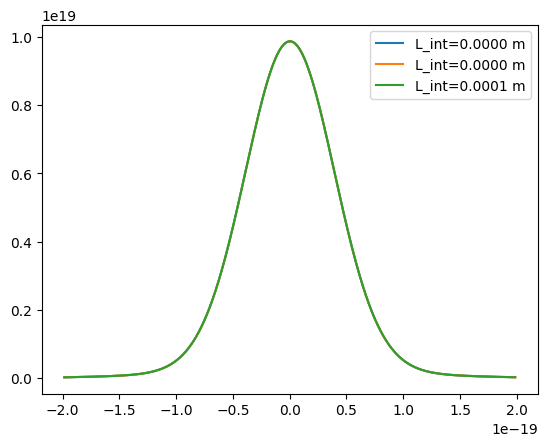

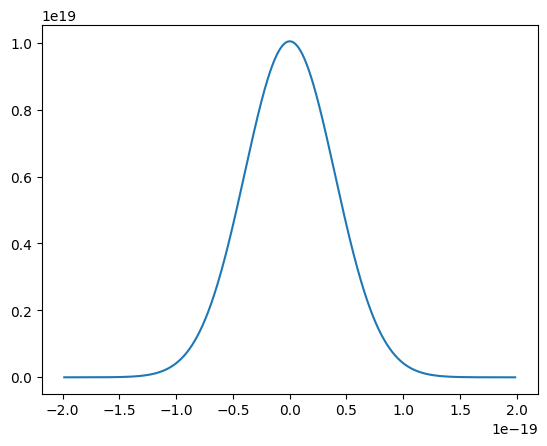

In [150]:
L_int = 0.01  # interaction length (m)
T     = L_int / v0     # interaction time (s)

def Energy_from_momentum(k):
    return (hbar * k)**2 / (2 * m)  # Energy from momentum k
N = 2**12
# --- ENERGY GRID
N_E   = N    # number of energy points

E_min = E0 - 5*deltaE
E_max = E0 + 5*deltaE

E_f   = np.linspace(E_min, E_max, N_E)
dE    = E_f[1] - E_f[0]
energy_span = E_max - E_min

δE_f =  E_f - E0

N_ω = N
omega_span = 10 * deltaE / hbar  # Narrow span around ω₀
ω_min = max(omega0 - omega_span/2 , 0*omega0)  # Start from ω₀ - span/2
ω_max = omega0 + omega_span/2   # End at ω₀ + span/2
ω_vec = np.linspace(ω_min, ω_max, N_ω)
dω = ω_vec[1] - ω_vec[0]

δω = ω_vec - omega0

δω_grid, δE_f_grid = np.meshgrid(δω, δE_f)
v_g = 0.101 * c  # Fixed group velocity for this scan
Delta_PM = k(E0 + δE_f_grid + hbar*δω_grid) - k(E0 + δE_f_grid - hbar*omega0) - (q0 + (δω / v_g) + 0.5 * recoil * δω**2)
# Simple Width vs. Interaction Length Scan
L_num = 5  # Number of interaction lengths to test
L_int_vec = np.linspace(0.00001, 0.001, L_num)  # m
L_int_vec = [0.00001, 0.00002, 0.00005]  # m - CHANGED TO FIXED VALUES
# L_int_vec = np.logspace(np.log10(L_critical*0.001), np.log10(100*L_critical), L_num)  # m - CHANGED TO LOG SCALE
plt.figure()
loss = q0*0.0001  # Loss term for the simulation
for L_int_test in L_int_vec:
    rho_f = np.sum((1/np.sqrt(2*np.pi*deltaE**2)) * np.exp(-(δE_f_grid + hbar*δω_grid)**2 / (2 * deltaE**2)) * 
                np.abs(np.sinc((k(E0 + δE_f_grid + hbar*δω_grid) - k(E0 + δE_f_grid - hbar*omega0) - (q0 + (δω_grid/ v_g) + 0.5 * recoil * δω_grid**2 + 1j*loss)) * L_int / 2 / np.pi))**2, axis=1) * dω
    rho_f /= np.sum(rho_f * dE)  # Normalize the final state probability density
    plt.plot(δω*hbar, rho_f, label="L_int={:.4f} m".format(L_int_test))
plt.legend()

plt.figure()
rho_i = np.exp(-δE_f**2/2/deltaE**2)/ np.sqrt(2*np.pi*deltaE**2)  # Initial state probability density

plt.plot(δE_f, rho_i, label="initial width= {:.4f} eV".format(initial_width))


In [22]:
print(np.sum(rho_f*dω))

nan


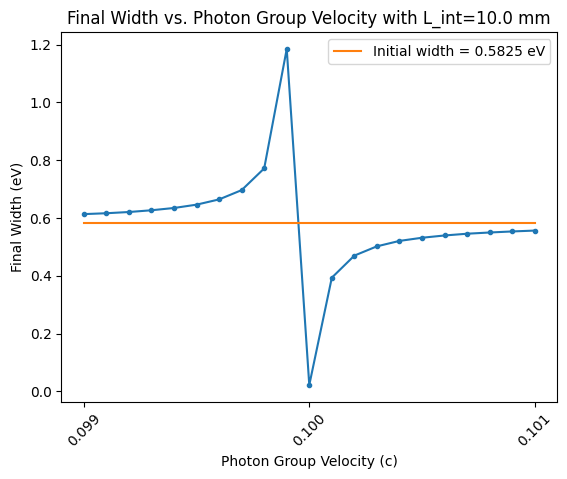

In [51]:
# Simple Width vs. v_g Scan
v_g_num = 21  # Number of group velocities to test
v_g_vec = np.linspace(0.099, 0.101, v_g_num) * c 
widths_vg = []
for v_g_test in v_g_vec:
    rho_f = np.sum((e**2 * hbar * L_int**2 / (2*(δω_grid+omega0)*m**2))*(1/np.sqrt(2*np.pi*deltaE**2)) * np.exp(-(δE_f_grid + hbar*δω_grid)**2 / (2 * deltaE**2)) * 
                   (np.sinc((k(E0 + δE_f_grid + hbar*δω_grid) - k(E0 + δE_f_grid - hbar*omega0) - (q0 + (δω_grid/ v_g_test) + 0.5 * recoil * δω_grid**2)) * L_int / 2 / np.pi))**2, axis=1) * dω
    rho_f /= np.sum(rho_f * dE)  # Normalize the final state probability density
    widths_vg.append(compute_FWHM(E_f, rho_f) / e)  # Store final width in eV

plt.figure()
plt.plot(v_g_vec / c, widths_vg, '.-')
plt.plot(v_g_vec / c, [initial_width]*v_g_num, label=f'Initial width = {initial_width:.4f} eV')      
plt.xlabel('Photon Group Velocity (c)')
plt.ylabel('Final Width (eV)')
plt.title(f"Final Width vs. Photon Group Velocity with L_int={L_int*1000} mm")
plt.xticks(np.arange(0.099, 0.102, 0.001), rotation=45)
plt.legend()    
plt.show()


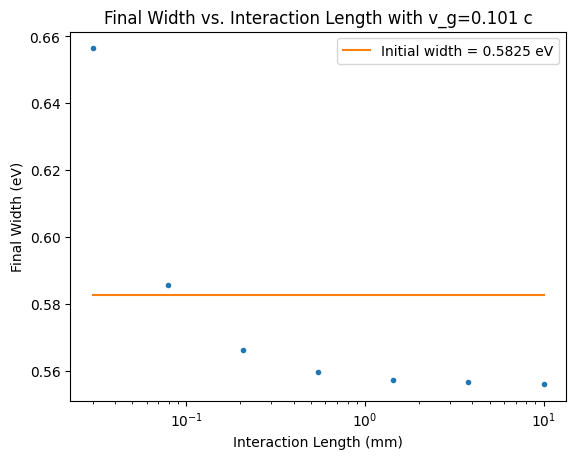

In [48]:
# Simple Width vs. Interaction Length Scan
L_num = 7  # Number of interaction lengths to test
L_int_vec = np.linspace(0.00003, 0.01, L_num)  # m
L_int_vec = np.logspace(np.log10(0.00003), np.log10(0.01), L_num)  # m - CHANGED TO LOG SCALE
v_g_test = 0.101 * c  # Fixed group velocity for this scan
widths_L = []
for L_int_test in L_int_vec:
    rho_f = np.sum((1/np.sqrt(2*np.pi*deltaE**2)) * np.exp(-(δE_f_grid + hbar*δω_grid)**2 / (2 * deltaE**2)) * 
                   (np.sinc((k(E0 + δE_f_grid + hbar*δω_grid) - k(E0 + δE_f_grid - hbar*omega0) - 
                             (q0 + (δω_grid/ v_g_test) + 0.5 * recoil * δω_grid**2)) * L_int_test / 2 / np.pi))**2, axis=1) * dω
    rho_f = rho_f/ np.sum(rho_f*dE)  # Normalize the final state probability density
    widths_L.append(compute_FWHM(E_f, rho_f)/e)  # Store final width in eV

plt.figure()
plt.plot(L_int_vec*1000, widths_L,'.')
plt.plot(L_int_vec*1000, [initial_width]*L_num, label=f'Initial width = {initial_width:.4f} eV')
plt.xlabel('Interaction Length (mm)')
plt.xscale('log')  
plt.ylabel('Final Width (eV)')
plt.title(f"Final Width vs. Interaction Length with v_g={v_g/c:.3f} c")
plt.legend()
plt.show()


In [46]:
L_critical*0.001

3.2797729441461505e-06

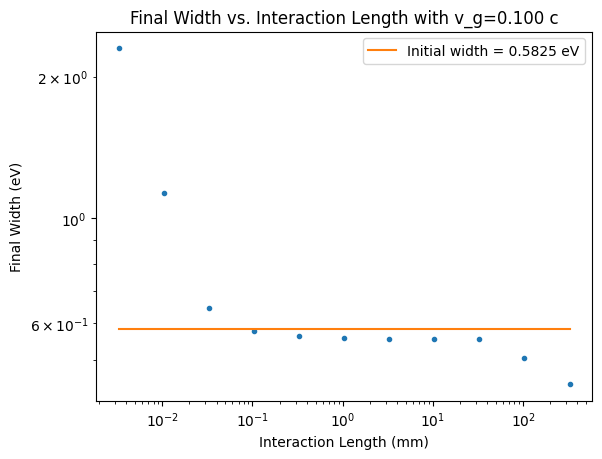

In [13]:
plt.figure()
plt.loglog(L_int_vec*1000, widths_L,'.')
plt.loglog(L_int_vec*1000, [initial_width]*L_num, label=f'Initial width = {initial_width:.4f} eV')
# plt.plot(L_int_vec*1000, widths_L,'.')
# plt.plot(L_int_vec*1000, [initial_width]*L_num, label=f'Initial width = {initial_width:.4f} eV')
plt.xlabel('Interaction Length (mm)')
plt.ylabel('Final Width (eV)')
plt.title(f"Final Width vs. Interaction Length with v_g={v_g/c:.3f} c")
plt.legend()
plt.show()

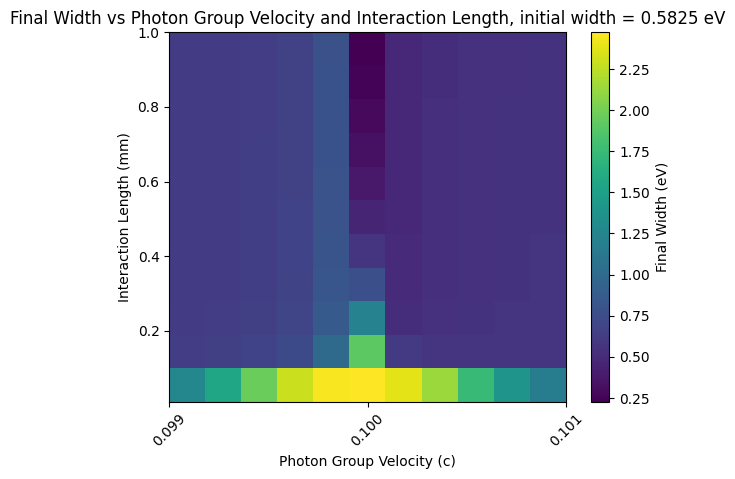

In [11]:
# 2D plot of widths vs v_g and L_int
L_num = 11  # Number of interaction lengths to test
v_g_num = 11  # Number of group velocities to test
L_int_vec = np.linspace(0.00001, 0.001, L_num)  # m
v_g_vec = np.linspace(0.099, 0.101, v_g_num) * c 

widths_2D = np.zeros((L_num, v_g_num))
for i, L_int_test in enumerate(L_int_vec):
    for j, v_g_test in enumerate(v_g_vec):
        rho_f = np.sum((1/np.sqrt(2*np.pi*deltaE**2)) * np.exp(-(δE_f_grid + hbar*δω_grid)**2 / (2 * deltaE**2)) * 
                   (np.sinc((k(E0 + δE_f_grid + hbar*δω_grid) - k(E0 + δE_f_grid - hbar*omega0) - 
                             (q0 + (δω_grid/ v_g_test) + 0.5 * recoil * δω_grid**2)) * L_int_test / 2 / np.pi))**2, axis=1) * dω
        rho_f /= np.sum(rho_f * dE)  # Normalize the final state probability density
        widths_2D[i, j] = compute_FWHM(E_f, rho_f) / e  # Store final width in eV
        
# create the 2D plot
plt.figure()
plt.imshow(widths_2D, extent=[v_g_vec.min()/c, v_g_vec.max()/c, L_int_vec.min()*1000, L_int_vec.max()*1000],
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Final Width (eV)')
plt.xlabel('Photon Group Velocity (c)')
plt.xticks(np.arange(0.099, 0.102, 0.001), rotation=45)
plt.ylabel('Interaction Length (mm)')
plt.title('Final Width vs Photon Group Velocity and Interaction Length, initial width = {:.4f} eV'.format(initial_width))
plt.show()


In [132]:
# different initial widths:
initial_widths_num = 5  # Number of interaction lengths to test
v_g_num = 41  # Number of group velocities to test
# L_int_vec = np.linspace(0.00001, 0.001, L_num)  # m
initial_widths_vec = np.linspace(0.5*initial_width, 2*initial_width, initial_widths_num)
# v_g_vec = np.linspace(0.099, 0.101, v_g_num) * c 
widths_2D_width = np.zeros((initial_widths_num, v_g_num))
for i,initial_width_test in enumerate(initial_widths_vec):
    deltaE_test = initial_width_test * e  # Convert eV to J
    
    for j, v_g_test in enumerate(v_g_vec):
        rho_f = np.sum((1/np.sqrt(2*np.pi*deltaE_test**2)) * np.exp(-(δE_f_grid + hbar*δω_grid)**2 / (2 * deltaE_test**2)) * 
                (np.sinc((k(E0 + δE_f_grid + hbar*δω_grid) - k(E0 + δE_f_grid - hbar*omega0) - (q0 + (δω_grid/ v_g_test) + 0.5 * recoil * δω_grid**2)) * L_int_test / 2 / np.pi))**2, axis=1) * dω
        rho_f /= np.sum(rho_f * dE)  # Normalize the final state probability density
        widths_2D_width[i, j] = compute_FWHM(E_f, rho_f) / e  # Store final width in eV

#     # create the 2D plot
#     plt.figure()
#     plt.imshow(widths_2D, extent=[v_g_vec.min()/c, v_g_vec.max()/c, L_int_vec.min()*1000, L_int_vec.max()*1000],
#             origin='lower', aspect='auto', cmap='viridis')
#     plt.colorbar(label='Final Width (eV)')
#     plt.xlabel('Photon Group Velocity (c)')
#     plt.xticks(np.arange(0.099, 0.102, 0.001), rotation=45)
#     plt.ylabel('Interaction Length (mm)')
#     plt.title(f'Final Width vs Photon Group Velocity and Interaction Length\nInitial Width = {initial_width_test:.4f} eV')
#     plt.tight_layout()
#     plt.show()
                

In [143]:
np.sinc(1+1j)

(-1.8380389551874883-1.838038955187489j)

In [130]:
initial_widths_vec

array([0.29126446, 0.50971281, 0.72816116, 0.94660951, 1.16505786])

In [144]:
# log scale L_int 2D graph:
L_num = 5  # Number of interaction lengths to test
L_int_vec = np.logspace(np.log10(0.00003), np.log10(0.01), L_num)  # m - CHANGED TO LOG SCALE
L_int_vec = np.linspace(0.00001, 0.002, L_num)  # m
v_g_num = 11  # Number of group velocities to test
v_g_vec = np.linspace(0.0999, 0.1001, v_g_num) * c 

widths_2D_loss = np.zeros((L_num, v_g_num))

loss = q0*0.01

for i, L_int_test in enumerate(tqdm(L_int_vec, desc="L_int", leave=False)):
    for j, v_g_test in enumerate(tqdm(v_g_vec, desc="v_g", leave=False)):
        rho_f = np.sum((1/np.sqrt(2*np.pi*deltaE**2)) * np.exp(-(δE_f_grid + hbar*δω_grid)**2 / (2 * deltaE**2)) * 
                   np.abs(np.sinc((k(E0 + δE_f_grid + hbar*δω_grid) - k(E0 + δE_f_grid - hbar*omega0) - (q0 + (δω_grid/ v_g_test) + 0.5 * recoil * δω_grid**2 + 1j * loss)) * L_int_test / 2 / np.pi))**2, axis=1) * dω
        rho_f /= np.sum(rho_f * dE)  # Normalize the final state probability density
        widths_2D_loss[i, j] = compute_FWHM(E_f, rho_f) / e  # Store final width in eV
        



L_int:  40%|████      | 2/5 [01:11<01:47, 35.79s/it]C:\Users\shiranev\AppData\Local\Temp\ipykernel_9268\2189166763.py:15: RuntimeWarning: overflow encountered in square
  np.abs(np.sinc((k(E0 + δE_f_grid + hbar*δω_grid) - k(E0 + δE_f_grid - hbar*omega0) - (q0 + (δω_grid/ v_g_test) + 0.5 * recoil * δω_grid**2 + 1j * loss)) * L_int_test / 2 / np.pi))**2, axis=1) * dω
C:\Users\shiranev\AppData\Local\Temp\ipykernel_9268\2189166763.py:16: RuntimeWarning: invalid value encountered in divide
  rho_f /= np.sum(rho_f * dE)  # Normalize the final state probability density
L_int:  60%|██████    | 3/5 [01:47<01:11, 35.62s/it]c:\Users\shiranev\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:3639: RuntimeWarning: overflow encountered in sin
  return sin(y)/y
c:\Users\shiranev\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:3639: RuntimeWarning: invalid value encountered in divide
  return sin(y)/y


In [112]:
W_saved[0].append(widths_2D)
W_saved[1].append(L_int_vec)    
W_saved[2].append(v_g_vec)
W_saved[0][0].shape

(21, 41)

In [117]:
W_saved_new = W_saved[0][0]
W_saved_new = np.append(W_saved_new, W_saved[0][1])
W_saved_new.shape

(1722,)

In [ ]:
W_saved_2 = [[], [], []]  # Initialize W_saved_2 for the new simulation
W_saved_2[0].append(widths_2D)
W_saved_2[1].append(L_int_vec)    
W_saved_2[2].append(v_g_vec)

In [91]:
v_g_vec/c

array([0.099  , 0.09905, 0.0991 , 0.09915, 0.0992 , 0.09925, 0.0993 ,
       0.09935, 0.0994 , 0.09945, 0.0995 , 0.09955, 0.0996 , 0.09965,
       0.0997 , 0.09975, 0.0998 , 0.09985, 0.0999 , 0.09995, 0.1    ,
       0.10005, 0.1001 , 0.10015, 0.1002 , 0.10025, 0.1003 , 0.10035,
       0.1004 , 0.10045, 0.1005 , 0.10055, 0.1006 , 0.10065, 0.1007 ,
       0.10075, 0.1008 , 0.10085, 0.1009 , 0.10095, 0.101  ])

In [ ]:
from qutip import *
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm

In [131]:
widths_2D_width

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

In [138]:
w.max()
w.min()

-0.4698985944568509

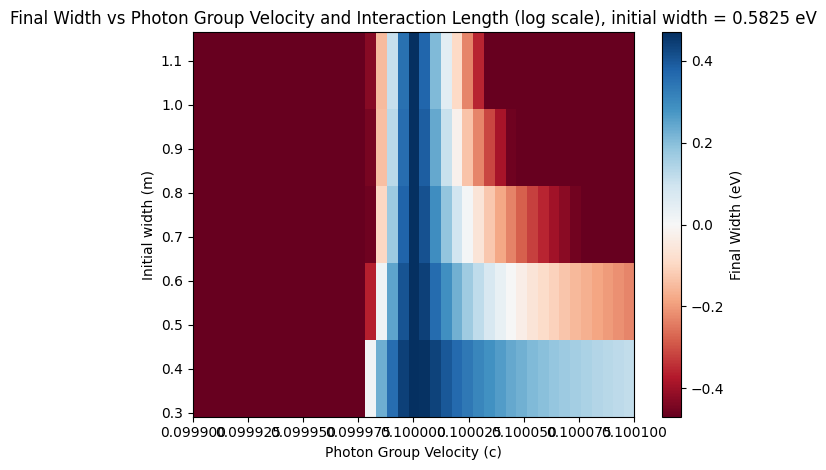

In [141]:

# create the 2D plot
plt.figure()
color_map = plt.get_cmap('RdBu')
# color_map.range = (0.0, 1.0)  # Set the range for the color map
# plt.imshow(widths_2D-initial_width,extent=[v_g_vec.min()/c, .max()/c, L_int_vec.min()*1000, L_int_vec.max()*1000],
#             origin='lower', aspect='auto', cmap='RdBu', norm=(vmin=-max(widths_2D-initial_width), vmax=max(widths_2D-initial_width)))
w = widths_2D_width - initial_width

nrm = matplotlib.colors.TwoSlopeNorm(vmin=w.min(), vcenter=0, vmax=-w.min())
cont0 = plt.imshow(-w, extent=[v_g_vec.min()/c, v_g_vec.max()/c, initial_widths_vec.min(), initial_widths_vec.max()], origin='lower', aspect='auto', cmap=cm.RdBu, norm=nrm)
plt.colorbar(label='Final Width (eV)')
plt.xlabel('Photon Group Velocity (c)')
plt.ylabel('Initial width (m)')
# plt.yscale('log')  
# plt.xticks(np.arange(0.099, 0.102, 0.001), rotation=45)
plt.title('Final Width vs Photon Group Velocity and Interaction Length (log scale), initial width = {:.4f} eV'.format(initial_width))
plt.tight_layout()
plt.show()

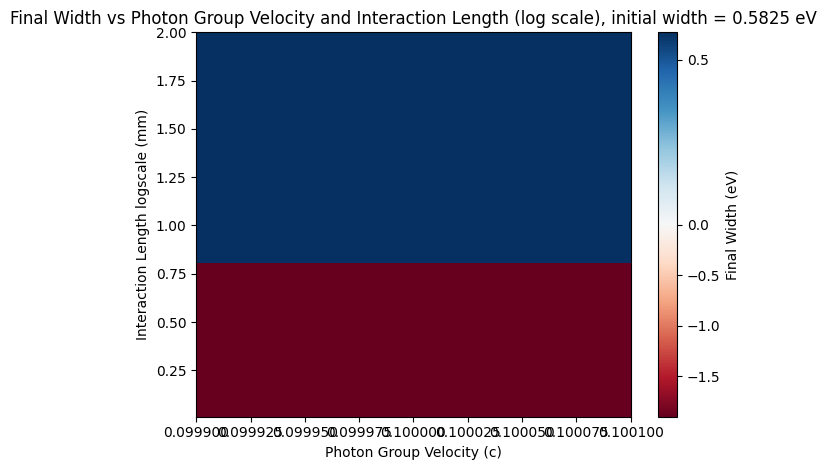

In [145]:

# create the 2D plot
plt.figure()
color_map = plt.get_cmap('RdBu')
# color_map.range = (0.0, 1.0)  # Set the range for the color map
# plt.imshow(widths_2D-initial_width,extent=[v_g_vec.min()/c, .max()/c, L_int_vec.min()*1000, L_int_vec.max()*1000],
#             origin='lower', aspect='auto', cmap='RdBu', norm=(vmin=-max(widths_2D-initial_width), vmax=max(widths_2D-initial_width)))
w =initial_width- widths_2D_loss

nrm = matplotlib.colors.TwoSlopeNorm(vmin=w.min(), vcenter=0, vmax=w.max())
cont0 = plt.imshow(w, extent=[v_g_vec.min()/c, v_g_vec.max()/c, L_int_vec.min()*1000, L_int_vec.max()*1000], origin='lower', aspect='auto', cmap=cm.RdBu, norm=nrm)
plt.colorbar(label='Final Width (eV)')
plt.xlabel('Photon Group Velocity (c)')
plt.ylabel('Interaction Length logscale (mm)')
# plt.yscale('log')  
# plt.xticks(np.arange(0.099, 0.102, 0.001), rotation=45)
plt.title('Final Width vs Photon Group Velocity and Interaction Length (log scale), initial width = {:.4f} eV'.format(initial_width))
plt.tight_layout()
plt.show()

In [154]:
w

array([[-1.89412732e+00, -1.89473286e+00, -1.89473286e+00,
        -1.89533840e+00, -1.89594394e+00, -1.89594394e+00,
        -1.89654948e+00, -1.89654948e+00, -1.89654948e+00,
        -1.89594394e+00, -1.89654948e+00, -1.89594394e+00,
        -1.89594394e+00, -1.89533840e+00, -1.89533840e+00,
        -1.89473286e+00, -1.89412732e+00, -1.89412732e+00,
        -1.89291625e+00, -1.89231071e+00, -1.89170517e+00,
        -1.89049409e+00, -1.88988855e+00, -1.88867747e+00,
        -1.88807193e+00, -1.88625531e+00, -1.88504423e+00,
        -1.88383315e+00, -1.88262207e+00, -1.88141100e+00,
        -1.87959438e+00, -1.87777776e+00, -1.87656668e+00,
        -1.87475006e+00, -1.87232790e+00, -1.87051129e+00,
        -1.86869467e+00, -1.86627251e+00, -1.86445589e+00,
        -1.86263927e+00, -1.86021712e+00],
       [-1.49507684e+00, -1.53867568e+00, -1.58590776e+00,
        -1.63556199e+00, -1.68461068e+00, -1.73002614e+00,
        -1.76817512e+00, -1.78997454e+00, -1.80208533e+00,
        -1.80

In [156]:
widths_2D

array([[2.47665625, 2.47726179, 2.47726179, 2.47786733, 2.47847287,
        2.47847287, 2.47907841, 2.47907841, 2.47907841, 2.47847287,
        2.47907841, 2.47847287, 2.47847287, 2.47786733, 2.47786733,
        2.47726179, 2.47665625, 2.47665625, 2.47544517, 2.47483963,
        2.47423409, 2.47302302, 2.47241748, 2.4712064 , 2.47060086,
        2.46878424, 2.46757316, 2.46636208, 2.465151  , 2.46393992,
        2.46212331, 2.46030669, 2.45909561, 2.45727899, 2.45485683,
        2.45304021, 2.4512236 , 2.44880144, 2.44698482, 2.4451682 ,
        2.44274604],
       [2.07760577, 2.12120461, 2.16843668, 2.21809092, 2.26713961,
        2.31255507, 2.35070405, 2.37250347, 2.38461426, 2.38885303,
        2.38461426, 2.37189793, 2.35009851, 2.31982154, 2.28167256,
        2.23504602, 2.18175855, 2.12120461, 2.05459527, 1.98374716,
        1.90805473, 1.82691245, 1.73971477, 1.64706724, 1.54836431,
        1.44845031, 1.35398616, 1.26799956, 1.19351821, 1.12933103,
        1.07301586, 1.02336

In [163]:
L_int_vec.min()

AttributeError: 'list' object has no attribute 'min'

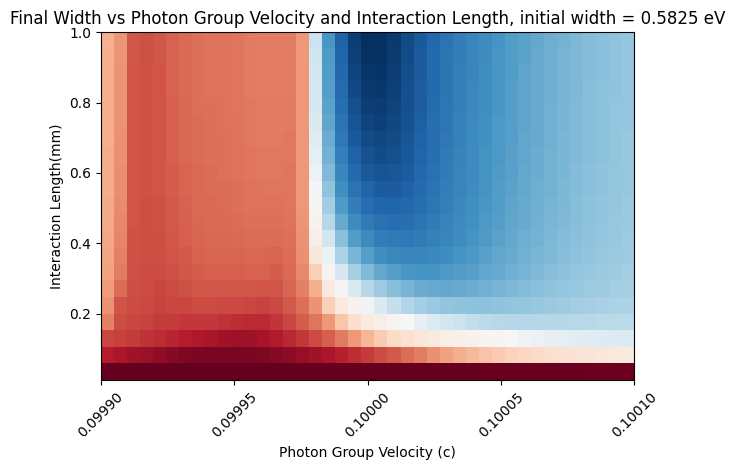

In [171]:

# create the 2D plot
plt.figure()
color_map = plt.get_cmap('RdBu')
# color_map.range = (0.0, 1.0)  # Set the range for the color map
# plt.imshow(widths_2D-initial_width,extent=[v_g_vec.min()/c, .max()/c, L_int_vec.min()*1000, L_int_vec.max()*1000],
#             origin='lower', aspect='auto', cmap='RdBu', norm=(vmin=-max(widths_2D-initial_width), vmax=max(widths_2D-initial_width)))
w =initial_width- widths_2D
L_int_vec = np.linspace(0.00001, 0.001, L_num)  # m
nrm = matplotlib.colors.TwoSlopeNorm(vmin=w.min(), vcenter=0, vmax=w.max())
cont0 = plt.imshow(w, extent=[v_g_vec.min()/c, v_g_vec.max()/c, L_int_vec.min()*1000, L_int_vec.max()*1000], origin='lower', aspect='auto', cmap=cm.RdBu, norm=nrm)
# plt.colorbar(label='Final Width (eV)')
plt.xlabel('Photon Group Velocity (c)')
plt.ylabel('Interaction Length(mm)')
# plt.yscale('log')  
plt.xticks(np.arange(v_g_vec.min()/c, v_g_vec.max()/c+0.00005, 0.00005), rotation=45)
plt.title('Final Width vs Photon Group Velocity and Interaction Length, initial width = {:.4f} eV'.format(initial_width))
plt.tight_layout()
plt.show()

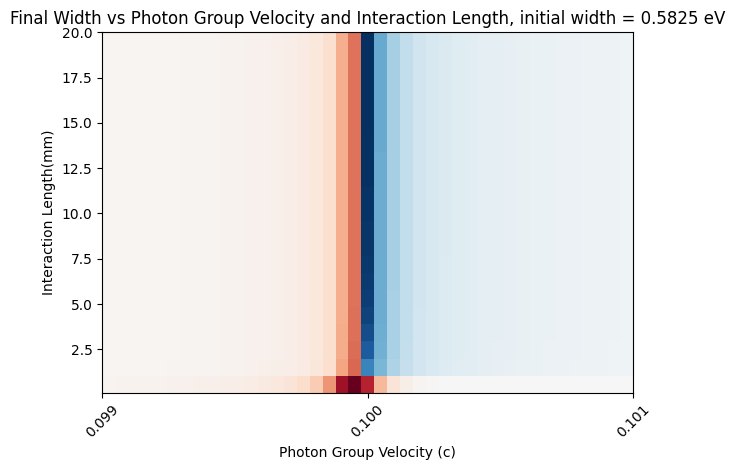

In [172]:
#scan on v_e
#add relativistic effects - check how to flatten the dispersion relation


# create the 2D plot
plt.figure()
color_map = plt.get_cmap('RdBu')
# color_map.range = (0.0, 1.0)  # Set the range for the color map
# plt.imshow(widths_2D-initial_width,extent=[v_g_vec.min()/c, .max()/c, L_int_vec.min()*1000, L_int_vec.max()*1000],
#             origin='lower', aspect='auto', cmap='RdBu', norm=(vmin=-max(widths_2D-initial_width), vmax=max(widths_2D-initial_width)))
w =initial_width- W_saved[0][0]

nrm = matplotlib.colors.TwoSlopeNorm(vmin=w.min(), vcenter=0, vmax=w.max())
cont0 = plt.imshow(w, extent=[W_saved[2][0].min()/c, W_saved[2][0].max()/c, W_saved[1][0].min()*1000, W_saved[1][0].max()*1000], origin='lower', aspect='auto', cmap=cm.RdBu, norm=nrm)
# plt.colorbar(label='Final Width (eV)')
plt.xlabel('Photon Group Velocity (c)')
plt.ylabel('Interaction Length(mm)')
# plt.yscale('log')  
plt.xticks(np.arange(0.099, 0.102, 0.001), rotation=45)
plt.title('Final Width vs Photon Group Velocity and Interaction Length, initial width = {:.4f} eV'.format(initial_width))
plt.tight_layout()
plt.show()

In [ ]:

# create the 2D plot
plt.figure()
color_map = plt.get_cmap('RdBu')
# color_map.range = (0.0, 1.0)  # Set the range for the color map
# plt.imshow(widths_2D-initial_width,extent=[v_g_vec.min()/c, .max()/c, L_int_vec.min()*1000, L_int_vec.max()*1000],
#             origin='lower', aspect='auto', cmap='RdBu', norm=(vmin=-max(widths_2D-initial_width), vmax=max(widths_2D-initial_width)))
w =initial_width- widths_2D

nrm = matplotlib.colors.TwoSlopeNorm(vmin=w.min(), vcenter=0, vmax=w.max())
cont0 = plt.imshow(w, extent=[v_g_vec.min()/c, v_g_vec.max()/c, L_int_vec.min()*1000, L_int_vec.max()*1000], origin='lower', aspect='auto', cmap=cm.RdBu, norm=nrm)
plt.colorbar(label='Final Width (eV)')
plt.xlabel('Photon Group Velocity (c)')
plt.ylabel('Interaction Length logscale (mm)')
# plt.yscale('log')  
# plt.xticks(np.arange(0.099, 0.102, 0.001), rotation=45)
plt.title('Final Width vs Photon Group Velocity and Interaction Length (log scale), initial width = {:.4f} eV'.format(initial_width))
plt.tight_layout()
plt.show()

(21, 41)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


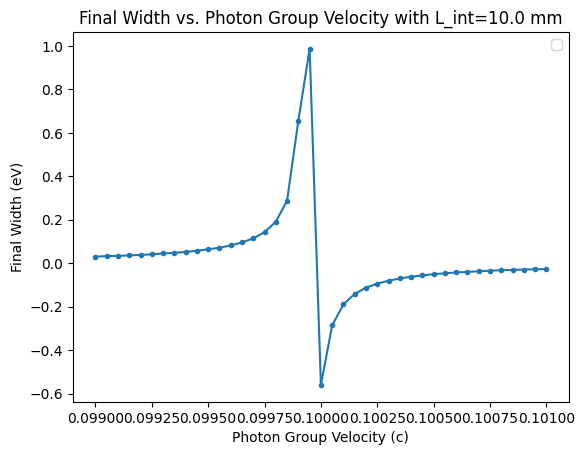

In [89]:
plt.figure()
# plt.plot(L_int_vec, w[:,21], '.-')
plt.plot(v_g_vec / c, w[10,:], '.-')
# plt.plot(v_g_vec / c, [initial_width]*v_g_num, label=f'Initial width = {initial_width:.4f} eV')      
plt.xlabel('Photon Group Velocity (c)')
plt.ylabel('Final Width (eV)')
plt.title(f"Final Width vs. Photon Group Velocity with L_int={L_int*1000} mm")
# plt.xticks(np.arange(0.099, 0.102, 0.001), rotation=45)
plt.legend()    
plt.show()